In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('max_colwidth', 800)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%%time

# Load the dataframes
test_df = pd.read_csv('data/cleaned-input.test.tsv', sep='\t', low_memory=False)
training_df = pd.read_csv('data/cleaned-input.training.tsv', sep='\t', low_memory=False)

CPU times: user 134 ms, sys: 17.9 ms, total: 152 ms
Wall time: 159 ms


# EDA

In [5]:
import eda_tools as et

In [6]:
explore_df = pd.DataFrame.from_csv('data/cleaned-input.training.tsv', sep='\t')

In [7]:
column_summaries = et.column_summaries(explore_df)

In [8]:
column_summaries.head()

dtype  unq_val_ct  percent_nans
CountyName        object          15      0.000000
CurrentOperator   object          56      0.000000
CurrentWellName   object        6529      0.000000
DFElev           float64           3     99.969367
FieldName         object         333      0.000000

In [9]:
data_dict = pd.read_html('data/Attribute+Descriptions.html')
data_dict = data_dict[0]

In [10]:
data_dict.head()

Field Name    Category  \
0           FileNo  Identifier   
1       CountyName    Location   
2  CurrentOperator         NaN   
3  CurrentWellName         NaN   
4           DFElev         NaN   

                                                                    Description  
0                                 North Dakota specific identifier for the well  
1                                  Name of the County where the well is located  
2                                    Name of the Company that operates the well  
3  Name of the well; essentially free text, naming conventions vary by operator  
4                                                      Drilling floor elevation

In [11]:
data_dict_master = column_summaries.join(data_dict.set_index("Field Name"))
data_dict_master

dtype  unq_val_ct  percent_nans          Category  \
CountyName               object          15      0.000000          Location   
CurrentOperator          object          56      0.000000               NaN   
CurrentWellName          object        6529      0.000000               NaN   
DFElev                  float64           3     99.969367               NaN   
FieldName                object         333      0.000000          Location   
Footages                 object        6120      0.000000               NaN   
GRElev                  float64         860     17.429928               NaN   
KBElev                  float64         883      6.019299               NaN   
LeaseName                object        3231      0.000000          Location   
LeaseNumber              object        4524      0.045949          Location   
OriginalOperator         object          99      0.000000               NaN   
OriginalWellName         object        6527      0.000000               NaN   
ProducedPools            object          14      0.168479           Geology   
QQ                       object          43      0.000000               NaN   
Range                    object          24      0.000000          Location   
Section                   int64          36      0.000000          Location   
TD                      float64        3375      0.214428               NaN   
Township                 object          30      0.000000          Location   
WellStatus               object           8      0.000000               NaN   
WellType                 object           1      0.000000               NaN   
Wellbore                 object           3      0.000000               NaN   
api                      object        6529      0.000000        Identifier   
bakken_isopach_ft       float64          14      0.000000           Geology   
bh_lat                  float64        6086      5.100322          Location   
bh_lng                  float64        6173      5.100322          Location   
choke_size               object         218      9.542043               NaN   
legs                    float64           9      5.100322               NaN   
max_tvd                 float64        6101      5.100322               NaN   
mean_tvd                float64        6197      5.100322               NaN   
min_tvd                 float64        6113      5.100322               NaN   
num_pools_produced        int64           2      0.000000               NaN   
production_liquid_120   float64        6155      2.190228            Target   
production_liquid_150   float64        6142      2.527186            Target   
production_liquid_180   float64        6128      3.430847            Target   
production_liquid_1825  float64         670     89.753408            Target   
production_liquid_270   float64        5798      9.067238            Target   
production_liquid_30    float64        5794      1.669475            Target   
production_liquid_365   float64        5374     16.311839            Target   
production_liquid_60    float64        6043      1.868586            Target   
production_liquid_730   float64        3713     42.717108            Target   
production_liquid_90    float64        6089      2.037065            Target   
spud_date                object        2134      0.398223               NaN   
std_tvd                 float64        6197      5.100322               NaN   
stimulated_formation     object          15     12.498085           Geology   
surface_lat             float64        6423      0.000000          Location   
surface_lng             float64        6395      0.000000          Location   
total_lbs_proppant      float64        5536     13.340481  CompletionDesign   
total_num_stages          int64          74      0.000000  CompletionDesign   
total_volume_bbls       float64        5354     15.071221  CompletionDesign   
tvd                     float64        6114      5.100322               NaN 

In [12]:
data_dict[data_dict["Category"] == "Geology"]

Field Name Category  \
13         ProducedPools  Geology   
23     bakken_isopach_ft  Geology   
44  stimulated_formation  Geology   

                                                                                                               Description  
13  Which rock formations are producing oil for this well. Same data, but different data source, as 'stimulated_formation'  
23                                   Thickness of the oil producing Bakken formation at the latitude/longitude of the well  
44        Which oil-producing formation was targeted by this well - Middle Bakken or Three Forks. See also 'ProducedPools'

In [13]:
data_dict_master[data_dict_master["unq_val_ct"] <20 ].sort_values("unq_val_ct")

dtype  unq_val_ct  percent_nans          Category  \
WellType               object           1      0.000000               NaN   
num_pools_produced      int64           2      0.000000               NaN   
DFElev                float64           3     99.969367               NaN   
Wellbore               object           3      0.000000               NaN   
WellStatus             object           8      0.000000               NaN   
legs                  float64           9      5.100322               NaN   
type_treatment         object          10     17.184868  CompletionDesign   
ProducedPools          object          14      0.168479           Geology   
bakken_isopach_ft     float64          14      0.000000           Geology   
CountyName             object          15      0.000000          Location   
stimulated_formation   object          15     12.498085           Geology   

                                                                                                                                 Description  
WellType                                                                                                         WellType (OG = 'Oil & Gas')  
num_pools_produced                                                                  Number of formations that will produce oil for this well  
DFElev                                                                                                              Drilling floor elevation  
Wellbore                                                               Type of well (this data set is limited to horizontal and directional)  
WellStatus                                                                                                 Status of the well (A = 'Active')  
legs                                                                                           Number of disjoint laterally drilled segments  
type_treatment                                                                Type of completion applied to this well (commonly "sand frac")  
ProducedPools         Which rock formations are producing oil for this well. Same data, but different data source, as 'stimulated_formation'  
bakken_isopach_ft                                      Thickness of the oil producing Bakken formation at the latitude/longitude of the well  
CountyName                                                                                      Name of the County where the well is located  
stimulated_formation        Which oil-producing formation was targeted by this well - Middle Bakken or Three Forks. See also 'ProducedPools'

In [14]:
categories = data_dict_master[data_dict_master["unq_val_ct"] <11 ].index.values
categories = categories[categories != "DFElev"]
categories

array(['WellStatus', 'WellType', 'Wellbore', 'legs', 'num_pools_produced',
       'type_treatment'], dtype=object)

In [15]:
data_dict_master[data_dict_master["Category"] == "CompletionDesign"]

dtype  unq_val_ct  percent_nans          Category  \
total_lbs_proppant  float64        5536     13.340481  CompletionDesign   
total_num_stages      int64          74      0.000000  CompletionDesign   
total_volume_bbls   float64        5354     15.071221  CompletionDesign   
type_treatment       object          10     17.184868  CompletionDesign   

                                                                                Description  
total_lbs_proppant           Total amount of proppant used on completion, across all stages  
total_num_stages                     Number of stages (segments) the well was stimulated in  
total_volume_bbls   Total amount of liquid used to pressurize the well to fracture the rock  
type_treatment               Type of completion applied to this well (commonly "sand frac")

In [17]:
 data_dict_master[data_dict_master["dtype"] == int]

dtype  unq_val_ct  percent_nans          Category  \
Section             int64          36           0.0          Location   
num_pools_produced  int64           2           0.0               NaN   
total_num_stages    int64          74           0.0  CompletionDesign   

                                                                                                               Description  
Section             Location of the well (Township, Range, Section) are related identifiers, from least- to most- specific  
num_pools_produced                                                Number of formations that will produce oil for this well  
total_num_stages                                                    Number of stages (segments) the well was stimulated in

In [18]:
explore_df.bh_lat.isnull().sum()

333

In [19]:
explore_df[explore_df.CurrentWellName.str.startswith("NELSEN")]

CountyName  CurrentOperator        CurrentWellName  DFElev  \
FileNo                                                              
20971    MCKENZIE  XTO ENERGY INC.  NELSEN STATE  24X-33R     NaN   
23761    MCKENZIE  XTO ENERGY INC.  NELSEN STATE  24X-33F     NaN   

          FieldName           Footages  GRElev  KBElev     LeaseName  \
FileNo                                                                 
20971   INDIAN HILL  272 FSL  2169 FWL  2188.0  2215.0  NELSEN STATE   
23761   INDIAN HILL  272 FSL  2139 FWL  2188.0  2213.0  NELSEN STATE   

       LeaseNumber       ...           std_tvd stimulated_formation  \
FileNo                   ...                                          
20971      24X-33R       ...         71.160435               bakken   
23761      24X-33F       ...         64.471905          three forks   

       surface_lat surface_lng total_lbs_proppant  total_num_stages  \
FileNo                                                                
20971    48.025099 -103.680932          2780580.0                24   
23761    48.025099 -103.681055          2735748.0                30   

        total_volume_bbls       tvd type_treatment well_status_date  
FileNo                                                               
20971             61822.0  10748.91      sand frac       2011-09-18  
23761            112079.0  10802.26      sand frac       2013-02-12  

[2 rows x 52 columns]

In [20]:
explore_df.query("legs == 4")

CountyName                            CurrentOperator  \
FileNo                                                         
20971    MCKENZIE                            XTO ENERGY INC.   
21999       BURKE                         PETRO-HUNT, L.L.C.   
19323    MCKENZIE                         QEP ENERGY COMPANY   
16854    MCKENZIE  BURLINGTON RESOURCES OIL & GAS COMPANY LP   
26538        DUNN                               OXY USA INC.   
21570   MOUNTRAIL          SLAWSON EXPLORATION COMPANY, INC.   
26454    MCKENZIE                            XTO ENERGY INC.   
17097        DUNN                       MARATHON OIL COMPANY   
18311    WILLIAMS                       STATOIL OIL & GAS LP   
19187        DUNN                            XTO ENERGY INC.   
27057      DIVIDE                           HUNT OIL COMPANY   
16479    BILLINGS                CONTINENTAL RESOURCES, INC.   
17984        DUNN                               OXY USA INC.   
19761    MCKENZIE          OASIS PETROLEUM NORTH AMERICA LLC   
21402    MCKENZIE            HESS BAKKEN INVESTMENTS II, LLC   
16694    MCKENZIE            HESS BAKKEN INVESTMENTS II, LLC   
21876    MCKENZIE                       STATOIL OIL & GAS LP   
16608    MCKENZIE                CONTINENTAL RESOURCES, INC.   
16999   MOUNTRAIL            HESS BAKKEN INVESTMENTS II, LLC   
20898    MCKENZIE                CONTINENTAL RESOURCES, INC.   
23025    MCKENZIE            WHITING OIL AND GAS CORPORATION   
20621    MCKENZIE  BURLINGTON RESOURCES OIL & GAS COMPANY LP   
16868        DUNN                       MARATHON OIL COMPANY   
18931    WILLIAMS            HESS BAKKEN INVESTMENTS II, LLC   
23121    MCKENZIE                          SM ENERGY COMPANY   
21112   MOUNTRAIL                       MARATHON OIL COMPANY   
20086    MCKENZIE                         HRC OPERATING, LLC   
22453    WILLIAMS                       STATOIL OIL & GAS LP   
25399    MCKENZIE                         HRC OPERATING, LLC   
23343   MOUNTRAIL          OASIS PETROLEUM NORTH AMERICA LLC   
...           ...                                        ...   
18307    WILLIAMS                       STATOIL OIL & GAS LP   
26202    MCKENZIE                               TRUE OIL LLC   
17258   MOUNTRAIL            HESS BAKKEN INVESTMENTS II, LLC   
21444      DIVIDE                   SAMSON RESOURCES COMPANY   
19271   MOUNTRAIL            WHITING OIL AND GAS CORPORATION   
22145        DUNN            HESS BAKKEN INVESTMENTS II, LLC   
21086    WILLIAMS                CONTINENTAL RESOURCES, INC.   
27867    WILLIAMS            WHITING OIL AND GAS CORPORATION   
24033    WILLIAMS                CONTINENTAL RESOURCES, INC.   
25841    BILLINGS            WHITING OIL AND GAS CORPORATION   
20077    MCKENZIE  BURLINGTON RESOURCES OIL & GAS COMPANY LP   
16640    WILLIAMS            HESS BAKKEN INVESTMENTS II, LLC   
27204    MCKENZIE                            XTO ENERGY INC.   
18742    WILLIAMS                CONTINENTAL RESOURCES, INC.   
16573        DUNN                            XTO ENERGY INC.   
27698    MCKENZIE  BURLINGTON RESOURCES OIL & GAS COMPANY LP   
16413    WILLIAMS            WHITING OIL AND GAS CORPORATION   
23712       STARK  FIDELITY EXPLORATION & PRODUCTION COMPANY   
20563    WILLIAMS            WHITING OIL AND GAS CORPORATION   
16478    BILLINGS                CONTINENTAL RESOURCES, INC.   
24865    MCKENZIE                               TRUE OIL LLC   
20201    MCKENZIE            WHITING OIL AND GAS CORPORATION   
16652    MCKENZIE                         QEP ENERGY COMPANY   
24653        DUNN                               OXY USA INC.   
20065    WILLIAMS                         HRC OPERATING, LLC   
19179    MCKENZIE                NEWFIELD PRODUCTION COMPANY   
19357    MCKENZIE                CONTINENTAL RESOURCES, INC.   
21065        DUNN            WHITING OIL AND GAS CORPORATION   
21268    WILLIAMS          OASIS PETROLEUM NORTH AMERICA LLC   
16162    MCKENZIE                      

In [21]:
data_dict_master[data_dict_master["dtype"] == float].sort_values("percent_nans", ascending=False)

dtype  unq_val_ct  percent_nans          Category  \
DFElev                  float64           3     99.969367               NaN   
production_liquid_1825  float64         670     89.753408            Target   
production_liquid_730   float64        3713     42.717108            Target   
GRElev                  float64         860     17.429928               NaN   
production_liquid_365   float64        5374     16.311839            Target   
total_volume_bbls       float64        5354     15.071221  CompletionDesign   
total_lbs_proppant      float64        5536     13.340481  CompletionDesign   
production_liquid_270   float64        5798      9.067238            Target   
KBElev                  float64         883      6.019299               NaN   
std_tvd                 float64        6197      5.100322               NaN   
tvd                     float64        6114      5.100322               NaN   
min_tvd                 float64        6113      5.100322               NaN   
mean_tvd                float64        6197      5.100322               NaN   
max_tvd                 float64        6101      5.100322               NaN   
legs                    float64           9      5.100322               NaN   
bh_lng                  float64        6173      5.100322          Location   
bh_lat                  float64        6086      5.100322          Location   
production_liquid_180   float64        6128      3.430847            Target   
production_liquid_150   float64        6142      2.527186            Target   
production_liquid_120   float64        6155      2.190228            Target   
production_liquid_90    float64        6089      2.037065            Target   
production_liquid_60    float64        6043      1.868586            Target   
production_liquid_30    float64        5794      1.669475            Target   
TD                      float64        3375      0.214428               NaN   
surface_lat             float64        6423      0.000000          Location   
surface_lng             float64        6395      0.000000          Location   
bakken_isopach_ft       float64          14      0.000000           Geology   

                                                                                                       Description  
DFElev                                                                                    Drilling floor elevation  
production_liquid_1825                                      Cumulative oil production after 1825 days of operation  
production_liquid_730                                        Cumulative oil production after 730 days of operation  
GRElev                                                                                            Graded elevation  
production_liquid_365                                        Cumulative oil production after 365 days of operation  
total_volume_bbls                          Total amount of liquid used to pressurize the well to fracture the rock  
total_lbs_proppant                                  Total amount of proppant used on completion, across all stages  
production_liquid_270                                        Cumulative oil production after 270 days of operation  
KBElev                                                                                     Kelly Bushing elevation  
std_tvd                   Standard deviation of all lateral true vertical depth measurements we have for this well  
tvd                                                            True vertical depth at the deepest part of the well  
min_tvd                 Minimum vertical depth measurement (along the length of the lateral bore hole) of the well  
mean_tvd                   Mean vertical depth measurement (along the length of the lateral bore hole) of the well  
max_tvd                 Maximum vertical depth measurement (along the length of the lateral bore hole) of the well  
legs                                                      

In [22]:
explore_df.Section.head(10)

FileNo
27863    23
20136     1
25780    30
24575    30
22752    34
21606    28
18983    11
23584     5
19712    29
17872    34
Name: Section, dtype: int64

In [23]:
explore_target = explore_df["production_liquid_90"]

In [24]:
#indexes are the file number and does not start with zero.
explore_df.reset_index().loc[0, "Section" ]

23

In [25]:
data_dict_master.sort_values("percent_nans", ascending=False).head(10)

dtype  unq_val_ct  percent_nans          Category  \
DFElev                  float64           3     99.969367               NaN   
production_liquid_1825  float64         670     89.753408            Target   
production_liquid_730   float64        3713     42.717108            Target   
GRElev                  float64         860     17.429928               NaN   
type_treatment           object          10     17.184868  CompletionDesign   
production_liquid_365   float64        5374     16.311839            Target   
total_volume_bbls       float64        5354     15.071221  CompletionDesign   
total_lbs_proppant      float64        5536     13.340481  CompletionDesign   
stimulated_formation     object          15     12.498085           Geology   
choke_size               object         218      9.542043               NaN   

                                                                                                                             Description  
DFElev                                                                                                          Drilling floor elevation  
production_liquid_1825                                                            Cumulative oil production after 1825 days of operation  
production_liquid_730                                                              Cumulative oil production after 730 days of operation  
GRElev                                                                                                                  Graded elevation  
type_treatment                                                            Type of completion applied to this well (commonly "sand frac")  
production_liquid_365                                                              Cumulative oil production after 365 days of operation  
total_volume_bbls                                                Total amount of liquid used to pressurize the well to fracture the rock  
total_lbs_proppant                                                        Total amount of proppant used on completion, across all stages  
stimulated_formation    Which oil-producing formation was targeted by this well - Middle Bakken or Three Forks. See also 'ProducedPools'  
choke_size                                                                             Diameter in inches of the mechanical flow limiter

### Need regex to parse these:

In [33]:
#need regex to parse this later.
explore_df.choke_size.unique()[:200]

array(['41/64', '20/64', '32/64', '48/64', '18/64', '24/64', '12/64',
       '46/64', nan, '14/64', '16/64', '26/64', '40/64', '28/64', '22/64',
       '/64', '44/64', '39/64', '10/64', '38/64', '36/64', '30/64',
       '43/64', '68/64', '42/64', '13/64', '9/64', '0/64', '23/64',
       '176/64', '34/64', '166/64', '25/64', '112/64', '5/16', '36/4',
       '253/64', '64/64', '50/64', '17/64', '63/64', '26/4', '20/4', 'na',
       '181/64', '11/32', '96/64', '52/64', '91/64', '53/64', '128/64',
       '38/4', '33/64', '35/64', '66/64', '45/64', '73/64', '58/64',
       '60/4', '19/64', '49/64', '128/4', '46/4', '116/64', '27/64',
       '27/32', '1/4', '70/64', '61/64', '136/64', '164/64', '179/64',
       '77/64', '32/4', '88/64', '15/64', '100/64', '32/34/64', '37/64',
       '21/64', '155/64', '11/64', '83/64', '281/64', '247/64', '1s/64',
       '19/32', '24/4', '51/64', '1a/64', '7/64', '114/64', '56/64',
       '9/32', '43/4', '8/64', '7/16', '84/64', '263/64', '60/64', '62/64',
 

In [223]:
explore_df[["choke_size_num", "choke_size_denom"]] = explore_df.choke_size.str.extract('(\d*)/(\d*)')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [224]:
explore_df["choke_size_num"] = pd.to_numeric(explore_df["choke_size_num"])
explore_df["choke_size_denom"] = pd.to_numeric(explore_df["choke_size_denom"])

In [225]:
print explore_df["choke_size_num"].dtype
explore_df["choke_size_denom"].dtype

float64


dtype('float64')

In [226]:
explore_df["choke_size_new"] = explore_df["choke_size_num"] / explore_df["choke_size_denom"]

In [227]:
explore_df.choke_size_new.describe()

count    5546.000000
mean        0.702518
std         2.496842
min         0.000000
25%         0.343750
50%         0.468750
75%         0.625000
max       117.750000
Name: choke_size_new, dtype: float64

In [228]:
explore_df["choke_size_denom"][explore_df["choke_size_denom"] == 4] = 64

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [231]:
def transform_numerator(x):
    temp_dict = {n+1: n* 64 for n in range(1,7)}
    test_dict = OrderedDict(sorted(temp_dict.items(), reverse=True))
    for k, v in test_dict.iteritems():
        if x > v:
            x = (x / float(k))
    return x

In [233]:
explore_df["choke_size_num"] = explore_df["choke_size_num"].apply(lambda x : transform_numerator(x))

In [234]:
explore_df["choke_size_new"] = explore_df["choke_size_num"] / explore_df["choke_size_denom"]

In [236]:
explore_df.choke_size_new.describe()

count    5546.000000
mean        0.484372
std         0.200554
min         0.000000
25%         0.343750
50%         0.468750
75%         0.625000
max         1.000000
Name: choke_size_new, dtype: float64

In [220]:
pd.options.display.max_rows=200

In [221]:
explore_df["choke_size_new"] = explore_df["choke_size_num"] / explore_df["choke_size_denom"]

In [235]:
print (explore_df["choke_size_new"]).count()
print (explore_df["choke_size_new"] > 1).sum()
print (explore_df["choke_size_new"] >= 10).sum()
print (explore_df["choke_size_new"] >= 50).sum()
print (explore_df["choke_size_num"] >= 64).sum()
print (explore_df["choke_size_denom"] < 64).sum()
print (explore_df["choke_size_denom"] == 4).sum()

5546
0
0
0
128
51
0


In [237]:
explore_df[["choke_size", "choke_size_num", "choke_size_denom", "choke_size_new"]]\
[explore_df["choke_size_denom"] == 4]

Empty DataFrame
Columns: [choke_size, choke_size_num, choke_size_denom, choke_size_new]
Index: []

In [109]:
explore_df[["choke_size", "choke_size_num", "choke_size_denom", "choke_size_new"]]\
[explore_df["choke_size_num"] == 1]

choke_size  choke_size_num  choke_size_denom  choke_size_new
FileNo                                                             
17528         1/4             1.0               4.0        0.250000
18182        1/64             1.0              64.0        0.015625
17102        1/64             1.0              64.0        0.015625
17573        1/64             1.0              64.0        0.015625
25383        1/64             1.0              64.0        0.015625
17177        1/64             1.0              64.0        0.015625
16538        1/64             1.0              64.0        0.015625
18569        1/64             1.0              64.0        0.015625
18223         1/4             1.0               4.0        0.250000
18211         1/4             1.0               4.0        0.250000
16828         1/4             1.0               4.0        0.250000
27312       1//64             1.0               NaN             NaN
21218       1//64             1.0               NaN             NaN

In [107]:
explore_df[["choke_size", "choke_size_num", "choke_size_denom", "choke_size_new"]]\
[(explore_df["choke_size_num"] == 1) &(explore_df["choke_size_denom"] == 4) ]

choke_size  choke_size_num  choke_size_denom  choke_size_new
FileNo                                                             
17528         1/4             1.0               4.0            0.25
18223         1/4             1.0               4.0            0.25
18211         1/4             1.0               4.0            0.25
16828         1/4             1.0               4.0            0.25

In [112]:
explore_df[["choke_size", "choke_size_num", "choke_size_denom", "choke_size_new"]]\
[(explore_df["choke_size_num"] == 3) &(explore_df["choke_size_denom"] == 4) ]

choke_size  choke_size_num  choke_size_denom  choke_size_new
FileNo                                                             
17018         3/4             3.0               4.0            0.75
18083         3/4             3.0               4.0            0.75

In [246]:
explore_df.new_choke_size.isnull().sum()

648

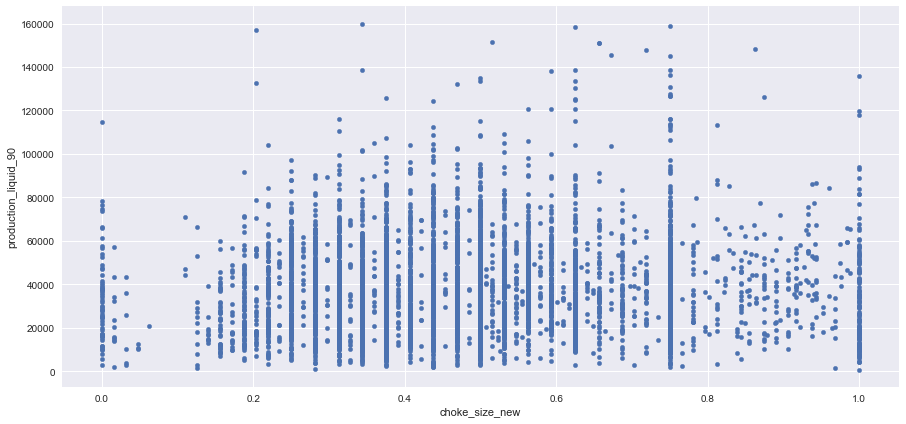

In [241]:
explore_df[["production_liquid_90", "choke_size_new"]].plot.scatter("choke_size_new", "production_liquid_90", figsize=(15,7))

In [248]:
explore_df.drop(["choke_size", "choke_size_num", "choke_size_denom", "new_choke_size"], axis=1, inplace=True)

In [244]:
explore_df["Footages"]

FileNo
27863      911 FSL  792 FEL
20136     300 FNL  1320 FEL
25780     311 FNL  1795 FWL
24575     310 FNL  2000 FWL
22752     805 FSL  1222 FWL
21606     350 FNL  1820 FWL
18983     435 FSL  1990 FEL
23584     260 FNL  2312 FWL
19712     175 FNL  2200 FEL
17872     2075 FNL  250 FWL
27140     340 FSL  2254 FEL
23445     492 FNL  1100 FEL
19232    1000 FNL  1140 FWL
24307     205 FNL  1605 FEL
23496     800 FNL  2387 FEL
20807      365 FNL  968 FEL
22982      435 FSL  395 FWL
25216     545 FNL  1815 FWL
24502     235 FNL  1650 FEL
17287      355 FSL  300 FEL
21571     260 FNL  2420 FEL
19071     405 FSL  1439 FWL
18305     314 FNL  2250 FEL
28204     220 FNL  1371 FEL
23321     2430 FSL  460 FEL
18488     300 FSL  1640 FEL
23719      230 FNL  985 FWL
18291     300 FNL  1480 FWL
28071      236 FSL  651 FWL
27047     1190 FSL  225 FEL
19273     249 FSL  2489 FEL
24382      390 FSL  765 FWL
17578     400 FNL  1700 FWL
21450     325 FNL  2250 FEL
24844     438 FNL  2602 FWL
17120     400

### Plots

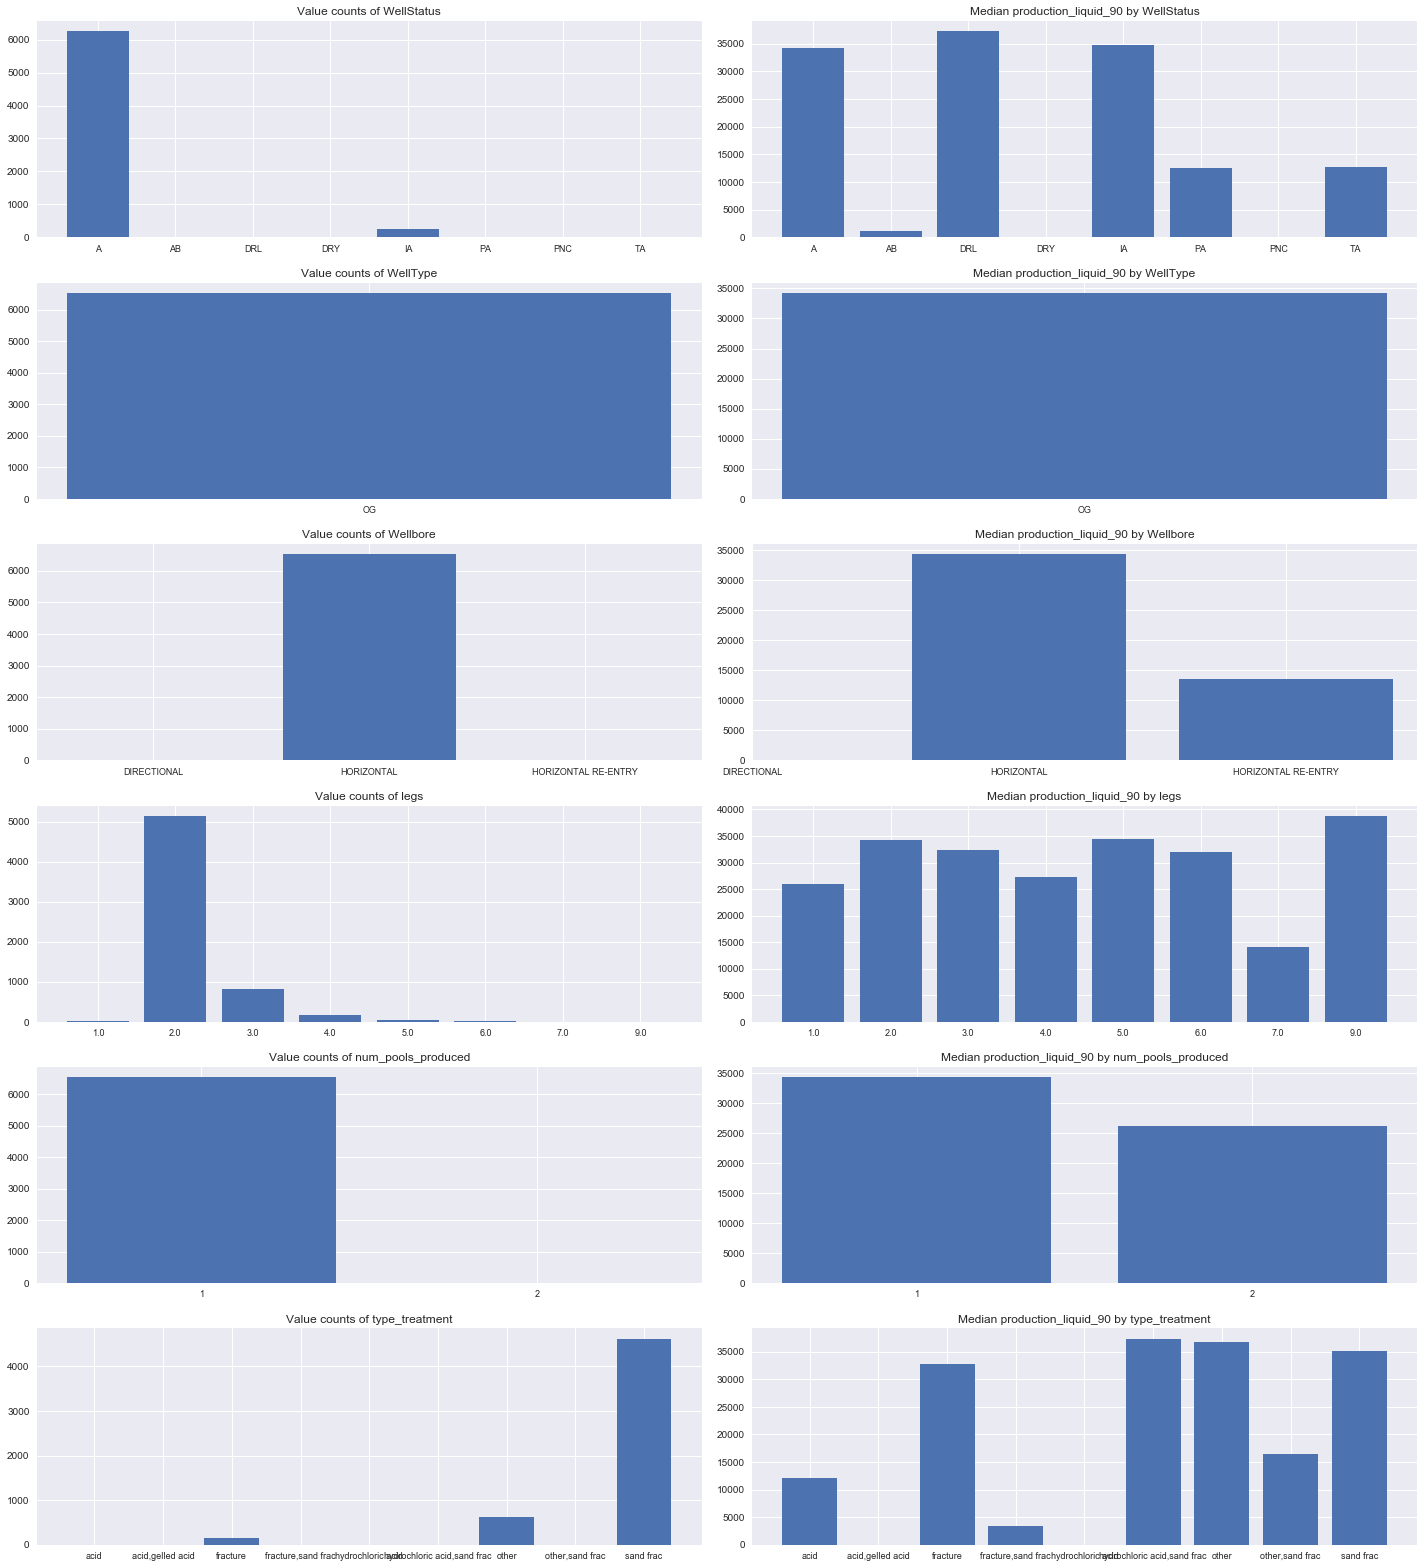

In [28]:
et.bar_plots(explore_df, list(categories), "production_liquid_90")

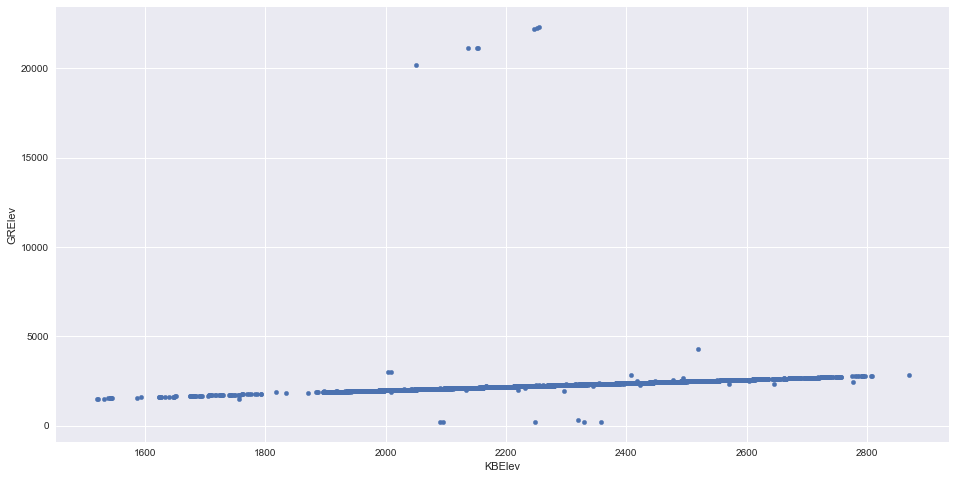

In [29]:
explore_df.plot.scatter("KBElev", "GRElev", figsize=(16,8))

In [30]:
fluid_and_proppant = explore_df[["total_volume_bbls", "total_lbs_proppant", ]]
fluid_and_proppant.head()

total_volume_bbls  total_lbs_proppant
FileNo                                       
27863             90232.0           3991618.0
20136             69347.0           3668254.0
25780             46463.0           3046163.0
24575             55196.0           4811400.0
22752                 NaN                 NaN

In [31]:
from scipy import stats
fluid_and_proppant.dropna(inplace=True)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


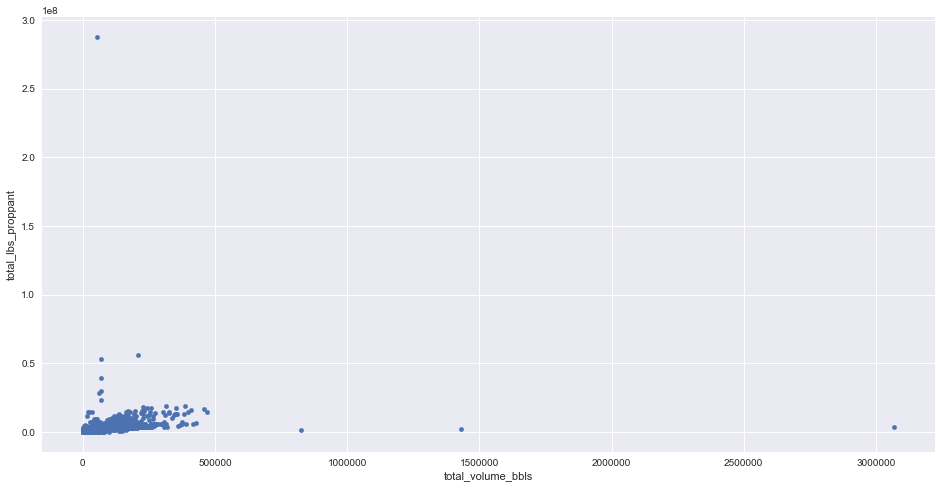

In [32]:
fluid_and_proppant.plot.scatter("total_volume_bbls", "total_lbs_proppant", figsize=(16,8))

## This is interesting:
### should these be collapsed?

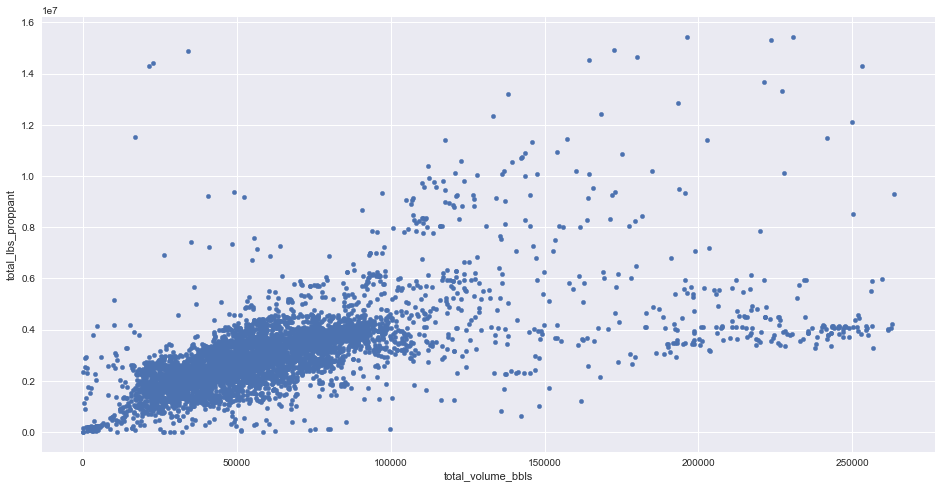

In [33]:
fluid_and_proppant[(np.abs(stats.zscore(fluid_and_proppant)) < 3).all(axis=1)].plot.scatter("total_volume_bbls", "total_lbs_proppant", figsize=(16,8))

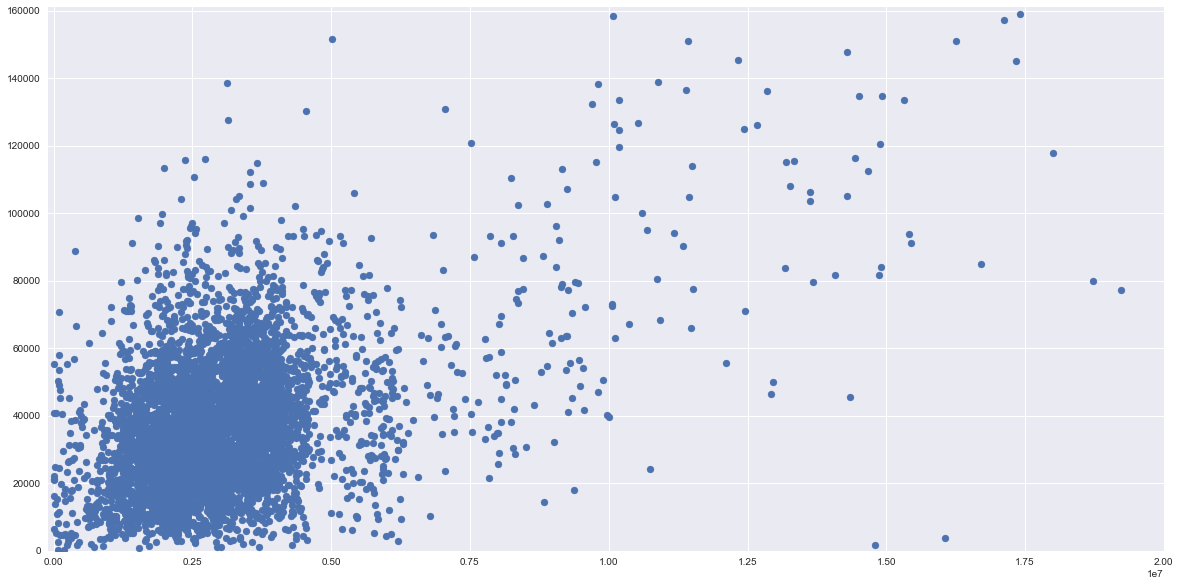

In [34]:
plt.figure(figsize=(20,10)) 
plt.axis([-100000, 2e7, 0,161000])
plt.scatter(explore_df.total_lbs_proppant, explore_df.production_liquid_90)

# Data Munging

In [35]:
import data_munging_tools as dmt

## Possible data leakage
### ...Still, it works for now.

In [255]:
# munge_df = pd.concat([training_df, test_df])
munge_df = explore_df.copy()

## Datetime Stuff

In [256]:
munge_df["spud_date"] = pd.to_datetime(munge_df["spud_date"], infer_datetime_format=True)

munge_df["spud_year"] = pd.DatetimeIndex(munge_df["spud_date"]).year

In [257]:
munge_df["spud_year"]

FileNo
27863    2014.0
20136    2011.0
25780    2013.0
24575    2013.0
22752    2012.0
21606    2011.0
18983    2010.0
23584    2014.0
19712    2010.0
17872    2010.0
27140    2014.0
23445    2013.0
19232    2011.0
24307    2013.0
23496    2012.0
20807    2011.0
22982    2012.0
25216       NaN
24502    2012.0
17287    2008.0
21571    2011.0
19071    2011.0
18305    2009.0
28204    2014.0
23321    2012.0
18488    2010.0
23719    2012.0
18291    2009.0
28071    2014.0
27047       NaN
19273    2011.0
24382    2013.0
17578    2008.0
21450    2011.0
24844    2013.0
17120    2008.0
26424    2013.0
20991    2012.0
21825    2012.0
23519    2012.0
27099    2013.0
18395    2010.0
18078    2009.0
17434    2008.0
20971    2011.0
24928    2013.0
25535    2013.0
26179    2013.0
22950    2012.0
19599    2010.0
25436    2013.0
28622    2014.0
25359    2013.0
24609    2013.0
23074    2012.0
25026    2013.0
21705    2011.0
17266    2008.0
17363    2008.0
18833    2010.0
26517    2014.0
26719    2013.0
2

In [258]:
print "spud date NaNs: {}".format(munge_df.spud_date.isnull().sum())
print "well status date NaNs: {}".format(munge_df.well_status_date.isnull().sum())

spud date NaNs: 26
well status date NaNs: 0


In [259]:
munge_df["well_status_date"].head()

FileNo
27863    2014-11-01
20136    2011-06-10
25780    2013-11-26
24575    2013-05-04
22752    2013-01-08
Name: well_status_date, dtype: object

In [260]:
munge_df["well_status_date"] = pd.to_datetime(munge_df["well_status_date"], infer_datetime_format=True)

munge_df["well_status_year"] = pd.DatetimeIndex(munge_df["well_status_date"]).year

In [261]:
munge_df["well_status_year"].head()

FileNo
27863    2014
20136    2011
25780    2013
24575    2013
22752    2013
Name: well_status_year, dtype: int64

In [262]:
munge_df.well_status_date.dtypes

dtype('<M8[ns]')

### Also an interesting plot. Target vs. well status date

In [45]:
import datetime

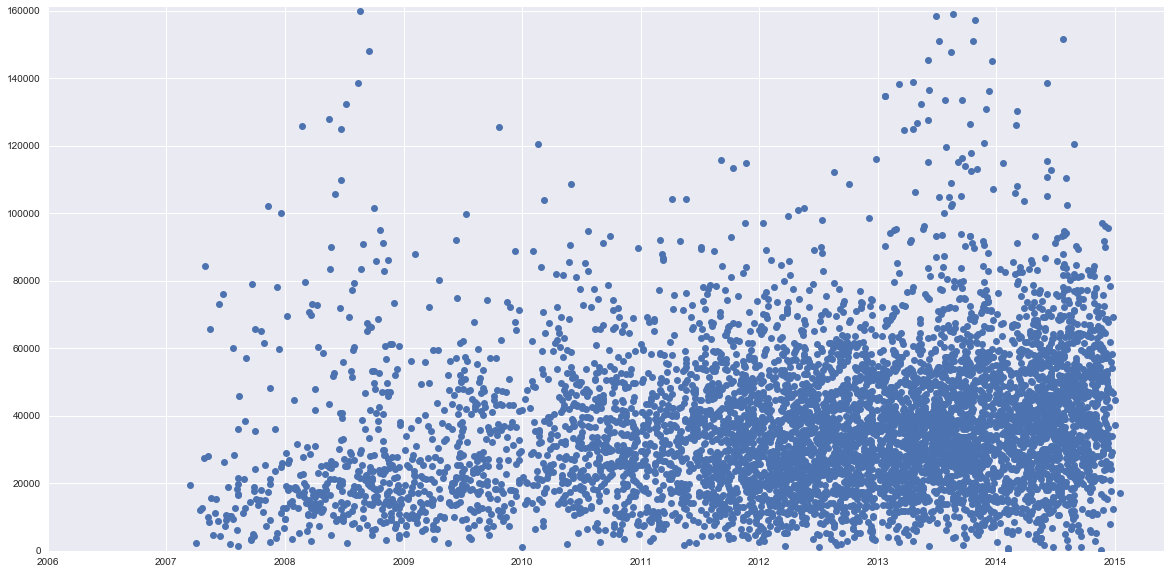

In [46]:
start = datetime.date(2006, 1, 1)
end = datetime.date(2015, 6, 1)

plt.figure(figsize=(20,10)) 
plt.axis([start, end, 0,161000])
plt.plot_date(munge_df["well_status_date"], munge_df["production_liquid_90"])


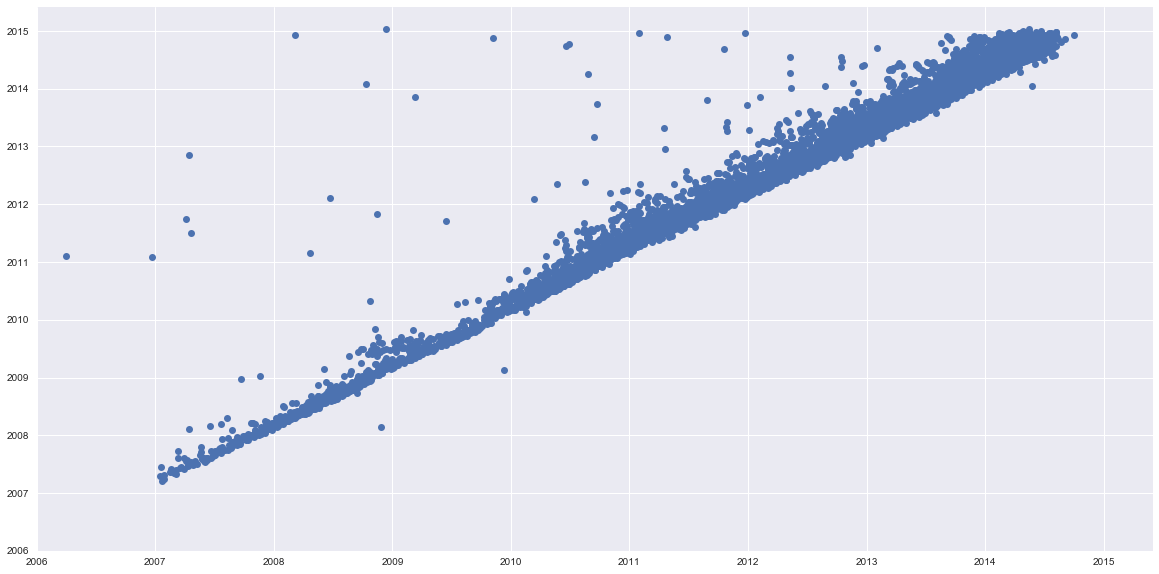

In [47]:
plt.figure(figsize=(20,10))
plt.axis([start, end, start, end])
plt.plot_date(munge_df["spud_date"], munge_df["well_status_date"])

In [47]:
munge_df["well_age"] = pd.DatetimeIndex(munge_df["well_status_date"] - munge_df["spud_date"]).day

I don't think this worked. Showing day of the month, rather than difference in days

In [166]:
munge_df.well_age.plot.hist(bins=30,figsize=(20,10))

AttributeError: 'DataFrame' object has no attribute 'well_age'

In [242]:
'''
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = munge_df["total_lbs_proppant"]
y = munge_df["total_volume_bbls"]
z = munge_df["tvd"]


trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')
'''

'\nimport plotly.plotly as py\nimport plotly.graph_objs as go\n\nimport numpy as np\n\nx = munge_df["total_lbs_proppant"]\ny = munge_df["total_volume_bbls"]\nz = munge_df["tvd"]\n\n\ntrace1 = go.Scatter3d(\n    x=x,\n    y=y,\n    z=z,\n    mode=\'markers\',\n    marker=dict(\n        size=10,\n        color=z,                # set color to an array/list of desired values\n        colorscale=\'Viridis\',   # choose a colorscale\n        opacity=0.8\n    )\n)\n\ndata = [trace1]\nlayout = go.Layout(\n    margin=dict(\n        l=0,\n        r=0,\n        b=0,\n        t=0\n    )\n)\nfig = go.Figure(data=data, layout=layout)\npy.iplot(fig, filename=\'3d-scatter-colorscale\')\n'

## Distance

In [253]:
import gpxpy

In [254]:
import gpxpy.geo

# Point one
lat1 = 52.2296756
lon1 = 21.0122287

# Point two
lat2 = 52.406374
lon2 = 16.9251681

# What you were looking for
dist = gpxpy.geo.haversine_distance(lat1, lon1, lat2, lon2)
print(dist)

278458.175075


In [277]:
def get_dist(row):
    dist_in_meters = gpxpy.geo.haversine_distance(row["bh_lat"], row["bh_lng"], row["surface_lat"], row["surface_lng"])
    return dist_in_meters * 3.28084

In [278]:
munge_df["lateral_length"] = munge_df.apply(get_dist, axis=1)

In [280]:
munge_df[["lateral_length", "mean_tvd"]].head(10)

lateral_length      mean_tvd
FileNo                              
27863      9447.910429  10868.577339
20136     10071.137081  10724.267533
25780      7542.647023   9830.268200
24575     10040.955528  10242.205128
22752      9864.390294   9706.356736
21606      9926.372315  10271.044725
18983      9916.168286  10804.180300
23584     10092.917306  10910.599879
19712     10144.980556  11110.017742
17872     10084.610434   9909.697687

In [281]:
munge_df["total_distance"] = munge_df["lateral_length"] + munge_df["mean_tvd"]

In [282]:
munge_df["total_distance"]

FileNo
27863    20316.487767
20136    20795.404613
25780    17372.915223
24575    20283.160656
22752    19570.747031
21606    20197.417040
18983    20720.348586
23584    21003.517185
19712    21254.998298
17872    19994.308121
27140    20713.783112
23445    20121.279924
19232    14789.216692
24307    19677.394883
23496    21750.143738
20807    12500.472681
22982    20329.657045
25216    18858.414432
24502    11911.610166
17287    15678.555879
21571    18556.816529
19071    19206.045450
18305    14874.586954
28204             NaN
23321    17515.699386
18488    20224.382192
23719    14267.899176
18291    20067.019980
28071             NaN
27047             NaN
19273    21852.227380
24382    10890.806280
17578    19930.077045
21450    18674.622148
24844    21220.579290
17120     9292.450985
26424    20914.747306
20991    16284.953515
21825    17318.126101
23519    20831.627578
27099    16187.948048
18395    20030.752049
18078    21246.648420
17434    14372.976415
20971    19669.077439
249

## Derived Features

In [283]:
munge_df["calc_fluid_per_ft"] = munge_df["total_volume_bbls"] / munge_df["total_distance"]

In [284]:
munge_df["calc_proppant_per_ft"] = munge_df["total_lbs_proppant"] / munge_df["total_distance"]

In [285]:
munge_df["calc_fluid_prop_ratio"] = munge_df["total_lbs_proppant"] / munge_df["total_volume_bbls"]

In [286]:
munge_df["calc_prop_fluid_ratio"] = munge_df["total_volume_bbls"] / munge_df["total_lbs_proppant"]

In [287]:
munge_df["stage_spacing"] = munge_df["total_num_stages"] / munge_df["total_distance"]

In [288]:
munge_df["stage_spacing"]

FileNo
27863    0.000984
20136    0.001827
25780    0.002648
24575    0.001479
22752    0.001533
21606    0.001040
18983    0.001158
23584    0.001428
19712    0.001129
17872    0.000900
27140    0.001448
23445    0.001690
19232    0.002029
24307    0.001575
23496    0.001379
20807    0.002400
22982    0.001672
25216    0.001379
24502    0.002686
17287    0.000064
21571    0.000808
19071    0.001041
18305    0.001345
28204         NaN
23321    0.001827
18488    0.000148
23719    0.001822
18291    0.000050
28071         NaN
27047         NaN
19273    0.001098
24382    0.002755
17578    0.000050
21450    0.001606
24844    0.001414
17120    0.000108
26424    0.001052
20991    0.001474
21825    0.001790
23519    0.001440
27099    0.002162
18395    0.000998
18078    0.000471
17434    0.000557
20971    0.001220
24928    0.003104
25535    0.001103
26179    0.002211
22950    0.001384
19599    0.001097
25436    0.001313
28622         NaN
25359    0.000938
24609    0.001307
23074    0.001531
250

## Munge Pipe

In [365]:
# munge_df_backup = munge_df.copy()
munge_df = munge_df_backup.copy()

In [366]:
munge_df.reset_index(inplace=True)

In [367]:
munge_df.drop(["api", "Section", "spud_date", "well_status_date", "FileNo"], axis=1, inplace=True)

In [368]:
munge_df.columns

Index([u'CountyName', u'CurrentOperator', u'CurrentWellName', u'DFElev',
       u'FieldName', u'Footages', u'GRElev', u'KBElev', u'LeaseName',
       u'LeaseNumber', u'OriginalOperator', u'OriginalWellName',
       u'ProducedPools', u'QQ', u'Range', u'TD', u'Township', u'WellStatus',
       u'WellType', u'Wellbore', u'bakken_isopach_ft', u'bh_lat', u'bh_lng',
       u'legs', u'max_tvd', u'mean_tvd', u'min_tvd', u'num_pools_produced',
       u'production_liquid_120', u'production_liquid_150',
       u'production_liquid_180', u'production_liquid_1825',
       u'production_liquid_270', u'production_liquid_30',
       u'production_liquid_365', u'production_liquid_60',
       u'production_liquid_730', u'production_liquid_90', u'std_tvd',
       u'stimulated_formation', u'surface_lat', u'surface_lng',
       u'total_lbs_proppant', u'total_num_stages', u'total_volume_bbls',
       u'tvd', u'type_treatment', u'choke_size_new', u'spud_year',
       u'well_status_year', u'lateral_length', u'tota

In [369]:
my_blacklist_patterns = ['^recent_ipt_', '^production_', 'total_num_stages', 'bakken_isopach_ft']

In [371]:
import data_munging_tools as dmt

In [372]:
TARGET_1 = "production_liquid_90"

In [373]:
munge_df = dmt.munge_pipe(munge_df, blacklist_patterns=my_blacklist_patterns, exceptions={TARGET_1}, null_cutoff=.21)

df shape before removals (6529, 57)
Shape before blacklist removal: (6529, 57)
Blacklisted columns: ['bakken_isopach_ft', 'production_liquid_120', 'production_liquid_150', 'production_liquid_180', 'production_liquid_1825', 'production_liquid_270', 'production_liquid_30', 'production_liquid_365', 'production_liquid_60', 'production_liquid_730', 'total_num_stages']
Number of blacklisted columns: 11
Shape after blacklist removal: (6529, 46)
**************************************************
Shape before cardinality removal: (6529, 46)
Dropped CurrentWellName since it was categorical and had a high cardinality
Dropped Footages since it was categorical and had a high cardinality
Dropped LeaseName since it was categorical and had a high cardinality
Dropped LeaseNumber since it was categorical and had a high cardinality
Dropped OriginalWellName since it was categorical and had a high cardinality
Shape after cardinality removal: (6529, 41)
**************************************************
Sha

### Imputation

In [374]:
from sklearn.model_selection import train_test_split

In [375]:
train_df, test_df = train_test_split(munge_df)

In [407]:
train_df.columns

Index([u'CountyName', u'CurrentOperator', u'FieldName', u'GRElev', u'KBElev',
       u'OriginalOperator', u'ProducedPools', u'QQ', u'Range', u'TD',
       u'Township', u'WellStatus', u'WellType', u'Wellbore', u'bh_lat',
       u'bh_lng', u'legs', u'max_tvd', u'mean_tvd', u'min_tvd',
       u'num_pools_produced', u'production_liquid_90', u'std_tvd',
       u'stimulated_formation', u'surface_lat', u'surface_lng',
       u'total_lbs_proppant', u'total_volume_bbls', u'tvd', u'type_treatment',
       u'choke_size_new', u'spud_year', u'well_status_year', u'lateral_length',
       u'total_distance', u'calc_fluid_per_ft', u'calc_proppant_per_ft',
       u'calc_fluid_prop_ratio', u'calc_prop_fluid_ratio', u'stage_spacing'],
      dtype='object')

In [376]:
train_df.shape

(4896, 40)

In [377]:
test_df.shape

(1633, 40)

In [378]:
from fancyimpute import MICE

In [379]:
mice_imputer = MICE(verbose=0)

In [380]:
filled_train_df, filled_test_df, y_train, y_test = dmt.fancy_impute_pipe(train_df, test_df, TARGET_1, mice_imputer)

In [381]:
# sum(filled_train_df.isnull().sum())
sum(filled_test_df.isnull().sum())

0

In [411]:
filled_train_df.drop("index", axis=1, inplace=True)

In [410]:
filled_test_df.columns

Index([u'GRElev', u'KBElev', u'TD', u'bh_lat', u'bh_lng', u'legs', u'max_tvd',
       u'mean_tvd', u'min_tvd', u'num_pools_produced',
       ...
       u'stimulated_formation_three forks', u'type_treatment_acid',
       u'type_treatment_fracture', u'type_treatment_fracture,sand frac',
       u'type_treatment_hydrochloric acid,sand frac', u'type_treatment_other',
       u'type_treatment_other,sand frac', u'type_treatment_sand frac',
       u'flag_str_test', u'flag_str_train'],
      dtype='object', length=608)

In [389]:
filled_train_df.to_csv("filled_train.csv")

In [392]:
filled_test_df.to_csv("filled_test.csv")

In [390]:
y_train.to_csv("y_train.csv")

In [391]:
y_test.to_csv("y_test.csv")

# Build Models

In [338]:
from sklearn.ensemble import ExtraTreesRegressor

In [423]:
etr = ExtraTreesRegressor(n_estimators=3000, max_depth=20, n_jobs=-1)

In [424]:
etr.fit(filled_train_df, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=20,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=-1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [425]:
etr.score(filled_test_df, y_test)

0.65081448656805585

### GBT

In [343]:
from sklearn.ensemble import GradientBoostingRegressor

In [418]:
gbr = GradientBoostingRegressor(learning_rate=0.1, n_estimators=3000, subsample = .8, random_state=1984)

In [419]:
gbr.fit(filled_train_df, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=1984,
             subsample=0.8, verbose=0, warm_start=False)

In [417]:
gbr.score(filled_test_df, y_test)

0.63981203995443758

### XG Boost

In [347]:
from xgboost import XGBRegressor

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [348]:
xgbr = XGBRegressor(seed=1984, n_estimators=5000, learning_rate=.01, subsample =.7, max_depth=7)

In [394]:
import cPickle
with open('xgboost_regressor.pkl', 'rb') as fid:
    xgbr_loaded = cPickle.load(fid)

In [397]:
xgbr_loaded.score(filled_test_df, y_test)

0.66919933783930197

In [ ]:
xgbr.score(filled_test_df, y_test)

## Model Evaluation

In [133]:
mft.eval_model(etr, X_test, y_test, y_train)

(147133958.71051571, 8891.889503940778, 12129.878759102075, 56.617316037238652)

In [149]:
gbr.score(X_test, y_test)

0.66898507918482819

In [405]:
mft.eval_model(gbr, filled_test_df, y_test, y_train)

ValueError: Number of features of the model must match the input. Model n_features is 609 and input n_features is 608 

In [403]:
mft.eval_model(xgbr_loaded, filled_test_df, y_test, y_train)

(141353402.56254292,
 8885.0264582048385,
 11889.213706656254,
 57.508487948999218)

### Feature Importances

In [428]:
feature_array = np.array(filled_train_df.columns)

In [429]:
filled_train_df.columns

Index([u'GRElev', u'KBElev', u'TD', u'bh_lat', u'bh_lng', u'legs', u'max_tvd',
       u'mean_tvd', u'min_tvd', u'num_pools_produced',
       ...
       u'stimulated_formation_three forks', u'type_treatment_acid',
       u'type_treatment_fracture', u'type_treatment_fracture,sand frac',
       u'type_treatment_hydrochloric acid,sand frac', u'type_treatment_other',
       u'type_treatment_other,sand frac', u'type_treatment_sand frac',
       u'flag_str_test', u'flag_str_train'],
      dtype='object', length=608)

In [430]:
models = [etr, gbr]

In [431]:
import model_fitting_tools as mft

In [432]:
mft.most_important_features(etr, feature_array)

array(['bh_lat', 'FieldName_PARSHALL', 'surface_lat', 'well_status_year',
       'total_lbs_proppant', 'spud_year', 'calc_proppant_per_ft',
       'surface_lng', 'bh_lng'], dtype=object)

In [433]:
mft.most_important_features(gbr, feature_array)

array(['std_tvd', 'stage_spacing', 'bh_lng', 'surface_lng',
       'total_lbs_proppant', 'bh_lat', 'lateral_length', 'TD',
       'total_volume_bbls'], dtype=object)

In [161]:
#whoops, index is still in there

In [434]:
mft.most_important_features(xgbr_loaded, feature_array)

AttributeError: 'XGBRegressor' object has no attribute 'feature_importances_'

In [402]:
xgbr_loaded.evals_result

<bound method XGBRegressor.evals_result of XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, n_estimators=5000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1984, silent=True, subsample=0.7)>